<a href="https://colab.research.google.com/github/Makssadilov2702/decision_tree/blob/main/%D0%94%D0%97_2_2_%D1%80%D0%B5%D0%B9%D1%81%D1%8B_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/SMADdataset/flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df.shape

(11231, 26)

In [ ]:
df.isna().values.any()

True

In [ ]:
df.isna().sum()

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
UNIQUE_CARRIER,0
TAIL_NUM,0
FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0


In [ ]:
df=df.drop('Unnamed: 25', axis=1)
df.isna().sum()

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
UNIQUE_CARRIER,0
TAIL_NUM,0
FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0


In [ ]:
 df=df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'ARR_DEL15']]
 df.isnull().sum()

,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
ORIGIN,0
DEST,0
CRS_DEP_TIME,0
ARR_DEL15,188


In [ ]:
df[df.isna().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [ ]:
df=df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


In [ ]:
import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)

df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [ ]:
print(df.columns)

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'ARR_DEL15'],
      dtype='object')


In [ ]:
df=pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.shape

(11231, 15)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)


RandomForestClassifier(random_state=13)

In [ ]:
predicted=model.predict(test_x)
model.score(test_x, test_y)

0.8642634623943035

In [ ]:
from sklearn.metrics import roc_auc_score
probabilities=model.predict_proba(test_x)

In [ ]:
roc_auc_score(test_y, probabilities [:, 1])

0.7014819895830565

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, predicted)
cm

array([[1903,   33],
       [ 272,   39]])

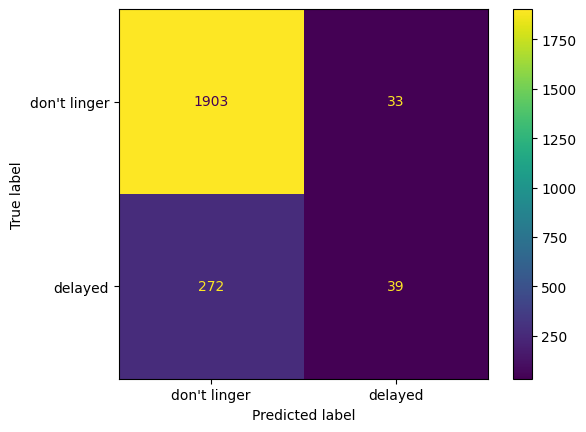

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= ["don't linger", "delayed"])
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score

train_predictions=model.predict(train_x)
precision_score(train_y, train_predictions)

1.0

In [ ]:
from sklearn.metrics import recall_score
recall_score (train_y, train_predictions)

0.9992012779552716

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

0.7014819895830565

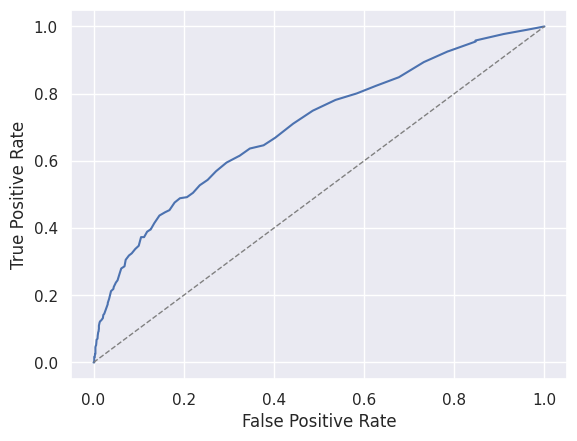

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _=roc_curve(test_y, probabilities [:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0,1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
metrics.auc(fpr, tpr)

In [ ]:
def predict_delay(departure_date_time, origin, destination):
  from datetime import datetime
  try:
    departure_date_time_parsed = datetime.strptime(departure_date_time,
                                                   '%d/%m/%Y %H:%M:%S')
  except ValueError as e:
    return 'Error parsing date/time - {}'.format(e)

  month = departure_date_time_parsed.month
  day_of_month = departure_date_time_parsed.day
  day_of_week = departure_date_time_parsed.isoweekday()
  hour = departure_date_time_parsed.hour

  origin = origin.upper()
  destination = destination.upper()

  input = [{'MONTH': month,
            'DAY_OF_MONTH': day_of_month,
            'DAY_OF_WEEK': day_of_week,
            'CRS_DEP_TIME': hour,
            'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
            'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
            'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
            'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
            'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
            'DEST_ATL': 1 if destination == 'ATL' else 0,
            'DEST_DTW': 1 if destination == 'DTW' else 0,
            'DEST_JFK': 1 if destination == 'JFK' else 0,
            'DEST_MSP': 1 if destination == 'MSP' else 0,
            'DEST_SEA': 1 if destination == 'SEA' else 0 }]

  return model.predict_proba(pd.DataFrame(input))[0][0]

In [ ]:
predict_delay ('1/10/2018 21:45:00', 'JFK', 'ATL')

0.88

In [ ]:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.87

In [ ]:
predict_delay('2/10/2018 21:45:00', 'ATL', 'SEA')

0.99

(0.0, 1.0)

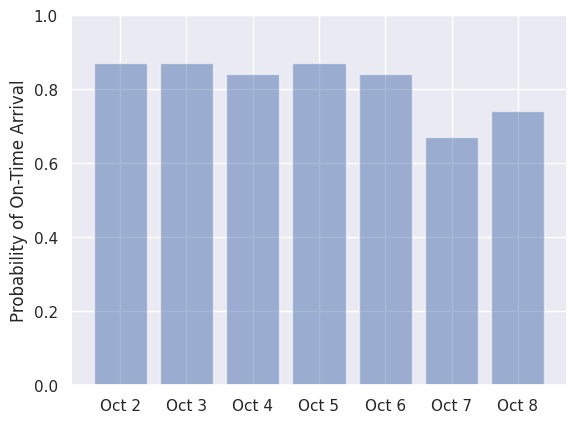

In [ ]:
import numpy as np

labels = ('Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7', 'Oct 8')
values = (predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('8/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

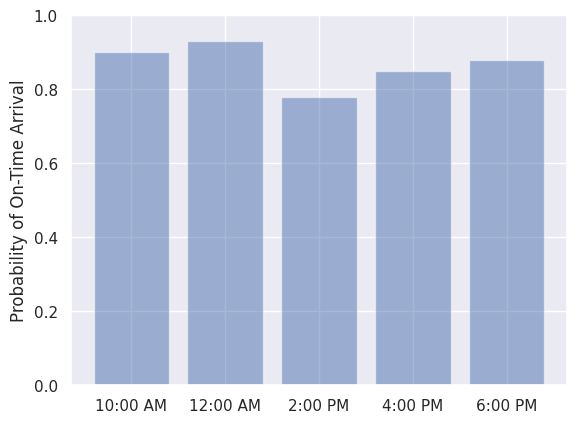

In [ ]:
import numpy as np

labels = ('10:00 AM', '12:00 AM', '2:00 PM', '4:00 PM', '6:00 PM')
values = (predict_delay('30/01/2018 10:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 12:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 14:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 16:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 18:00:00', 'SEA', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))